# Getting Started with Matplotlib

## Visualizaiton plays a vital role in understanding data
## Matplotlib is a standard Python package to create graphics

#### tutorial : https://matplotlib.org/users/pyplot_tutorial.html                                api: https://matplotlib.org/api/pyplot_api.html

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np

# include to properly display matplotlib in jupyter notebook
%matplotlib notebook  

### First Graph

<IPython.core.display.Javascript object>


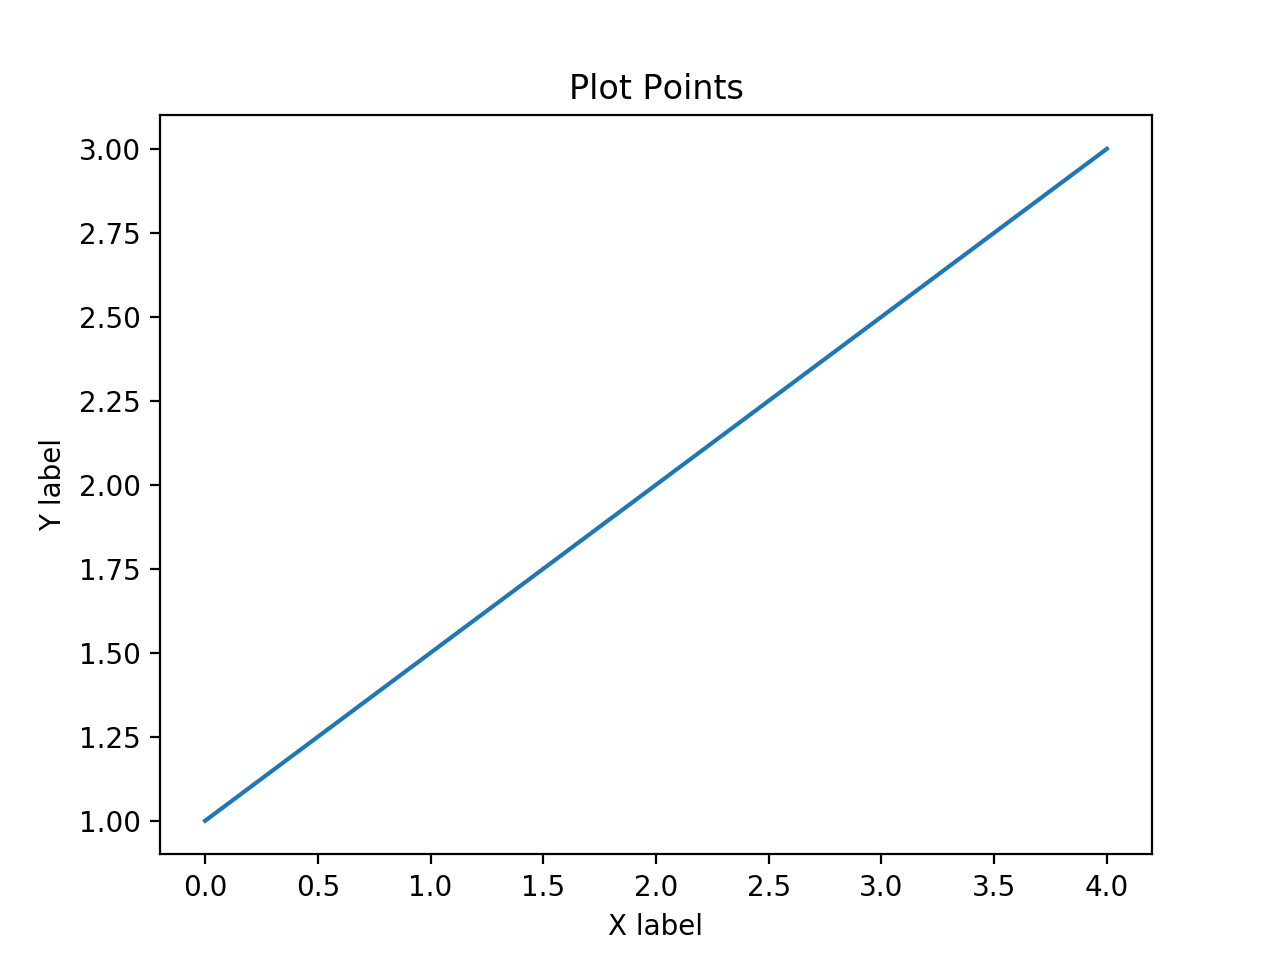

In [2]:
plt.plot([0,1,2,3,4], [1, 1.5, 2, 2.5, 3]) # plot is a versatile method, one recognized argument input is 2 lists representing x and y values
plt.ylabel('Y label')
plt.xlabel('X label')
plt.title('Plot Points')

### Figures and Subplots
A figure is created via the plt.figure() method.
In Figure 1 above we did not explicity code the plt.figure() method and so by default plt.figure(1) ran. 

Multiple graphs can be in one figure with plt.subplot()    
subplot(r,c,fn) is given 3 arguments number of rows, number of columns and figure number    
         By default in figure one plt.subplot(111) ran. Notice plt.subplot(111) is shorthand for plt.subplot(1, 1, 1)  


<IPython.core.display.Javascript object>


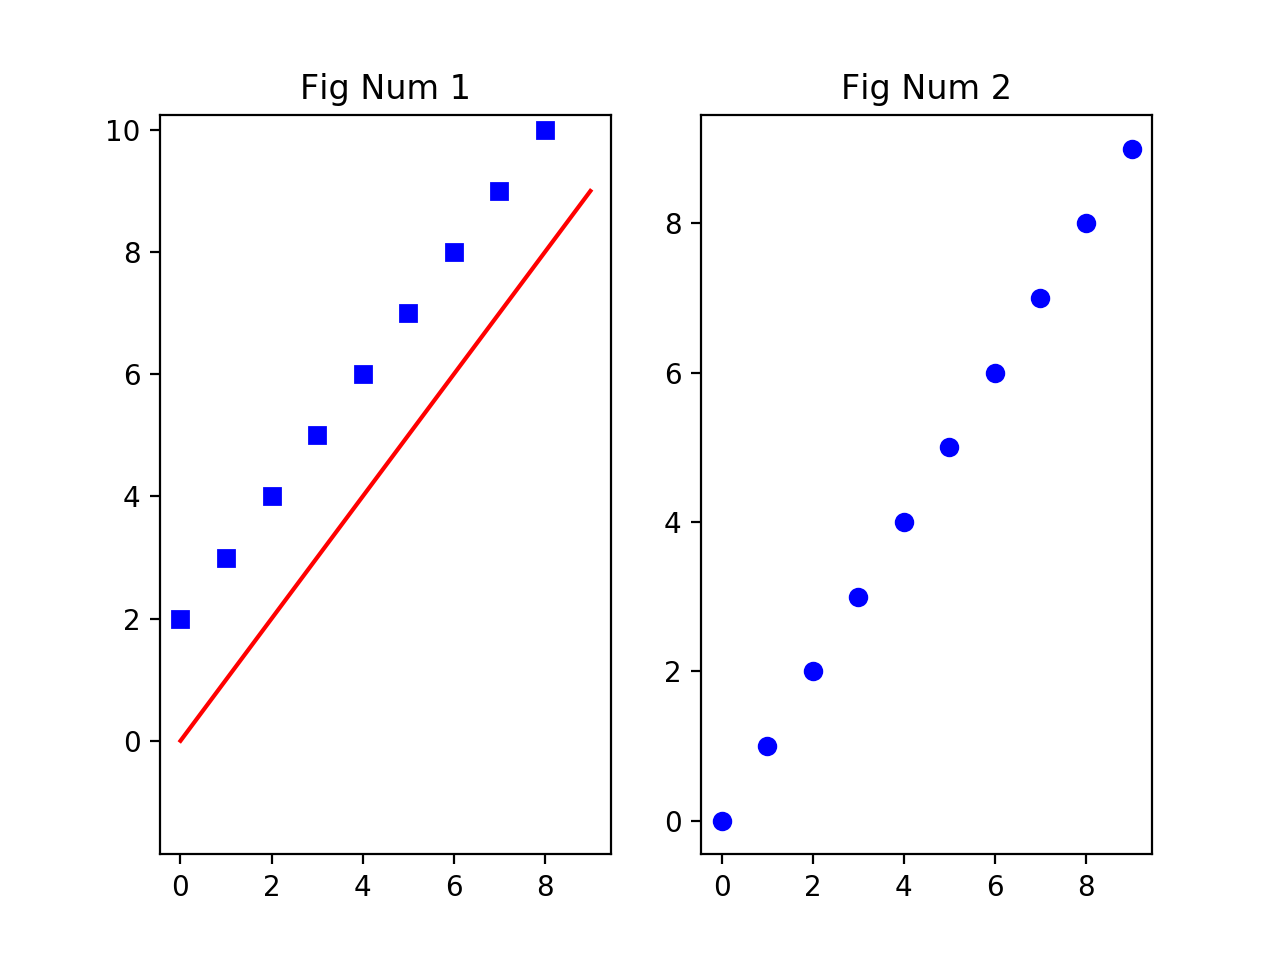

In [3]:
plt.figure(2)  # create new figure
x = np.arange(0,10)  # plot() can take numpy arrays as arguments 
y = np.arange(0, 10)
y2 = np.arange(2, 12) 
              
plt.subplot(1,2,1)  # 1 row, 2 columns, figure number 1

# pass multiple arrays into plot in order to plot on same graph
plt.plot(x, y, 'r-', x, y2, 'bs') # # r:red -:line, b:blue s:square
plt.title("Fig Num 1")


plt.subplot(1,2,2)  # 1 row, 2 columns, figure number 2

plt.plot(x, y, 'bo')  # 'b:blue o:circle'
plt.title("Fig Num 2")

subplots() is a function that is useful because it returns a figure and axes objects.          
The figure and axes objects can be used to change the graph as desired                    
like subplot(), subplots() takes as number of rows and number of columns as a parameter

<IPython.core.display.Javascript object>


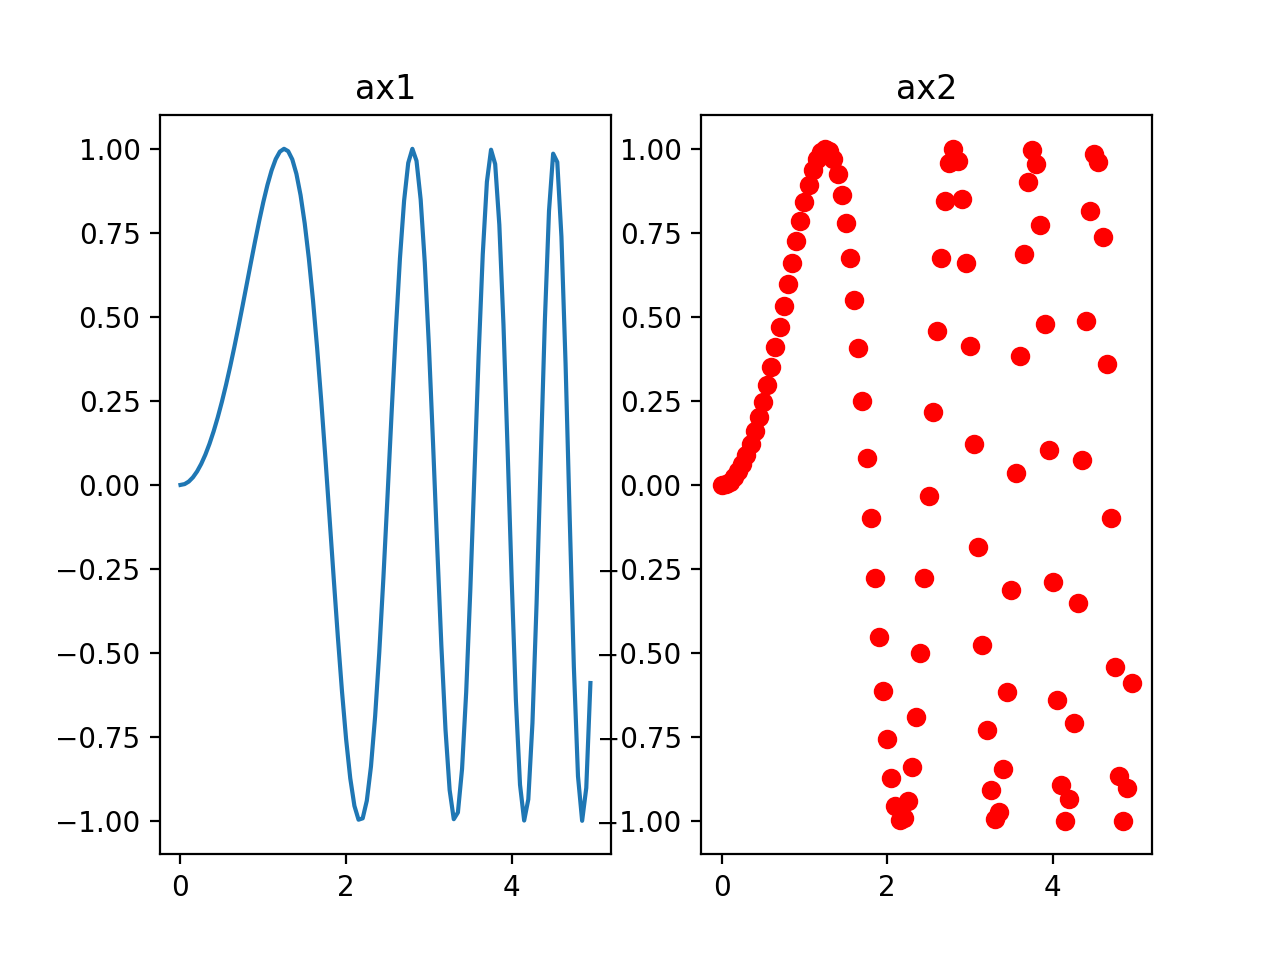

In [4]:
x = np.arange(0,5, .05)
y = np.sin(x ** 2)

f, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
ax1.plot(x, y)
ax1.set_title('ax1')
ax2.plot(x, y, 'ro')
ax2.set_title('ax2')

## 3D Animation Example
As the 3D animation shows, there is a lot one can do with matplotlib            
code pasted from: https://matplotlib.org/examples/animation/simple_3danim.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

